In [1]:
# ติดตั้ง TensorFlow (หากยังไม่ได้ติดตั้ง)
!pip install tensorflow

In [19]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
from google.colab import files
uploaded = files.upload()

Saving weather_rain_modified.csv to weather_rain_modified (1).csv


In [21]:
file_path = 'weather_rain_modified.csv'
df = pd.read_csv(file_path)

In [22]:
df.fillna(df.mean(), inplace=True)

In [23]:
# จัดการค่า Missing Values (เติมด้วยค่าเฉลี่ย)
df_filled = df.fillna(df.mean())

In [32]:
# ทำ Normalization โดยใช้ Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)


In [33]:
# แบ่งข้อมูลเป็น Train และ Test set
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled.drop(columns=["Temperature"]),  # Features
    df_scaled["Temperature"],  # Target (Predicting Temperature)
    test_size=0.2,
    random_state=42
)


In [34]:
# สร้างโมเดล Neural Network
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(4,)),  # Hidden Layer 1
    layers.Dropout(0.2),  # ลด Overfitting
    layers.Dense(64, activation="relu"),  # Hidden Layer 2
    layers.Dense(32, activation="relu"),  # Hidden Layer 3
    layers.Dense(1)  # Output Layer (Regression)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# คอมไพล์โมเดล
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])


In [13]:
# แสดงโครงสร้างของโมเดล
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1700 - mae: 0.3367 - val_loss: 0.0908 - val_mae: 0.2506
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0880 - mae: 0.2460 - val_loss: 0.0824 - val_mae: 0.2394
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0819 - mae: 0.2391 - val_loss: 0.0814 - val_mae: 0.2385
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0830 - mae: 0.2394 - val_loss: 0.0806 - val_mae: 0.2373
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0804 - mae: 0.2362 - val_loss: 0.0815 - val_mae: 0.2387
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0811 - mae: 0.2386 - val_loss: 0.0787 - val_mae: 0.2344
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0799 - mae: 0.2345 - val_loss: 0.0788 - val_mae: 0.2337
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0813 - mae: 0.2384 - val_loss: 0.0785 - val_mae: 0.2336
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.07

In [37]:
# ประเมินผลโมเดล
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Mean Absolute Error (MAE) on Test Set: {test_mae}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0836 - mae: 0.2407 
Mean Absolute Error (MAE) on Test Set: 0.23641829192638397


In [38]:
# แสดงกราฟผลการเทรน
import matplotlib.pyplot as plt

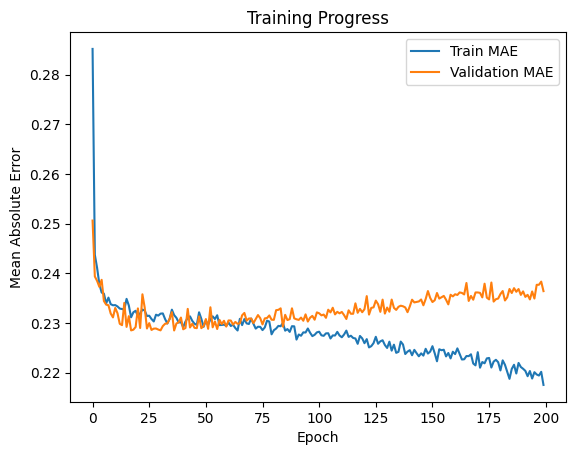

In [39]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("Training Progress")
plt.show()


In [43]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Mean Absolute Error (MAE) on Test Set: {test_mae:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0836 - mae: 0.2407
Mean Absolute Error (MAE) on Test Set: 0.2364


In [ ]:
# 🔹 รับค่าจากผู้ใช้เพื่อนำไปพยากรณ์อุณหภูมิ
print("\n📌 กรอกค่าข้อมูลเพื่อทำนายอุณหภูมิ:")
humidity = float(input("Humidity: "))
wind_speed = float(input("Wind Speed: "))
cloud_cover = float(input("Cloud Cover: "))
pressure = float(input("Pressure: "))

# ทำ Normalization อินพุตที่รับมา
input_data = scaler.transform([[0, humidity, wind_speed, cloud_cover, pressure]])[:, 1:]  # ข้าม Temperature

# ทำการพยากรณ์
predicted_temp = model.predict(input_data)

# แปลงค่าอุณหภูมิที่พยากรณ์ได้กลับสู่หน่วยจริง
predicted_temp_original = scaler.inverse_transform([[predicted_temp[0][0], 0, 0, 0, 0]])[0][0]

# แสดงผลลัพธ์ที่พยากรณ์ได้
print(f"\n🌡️ อุณหภูมิที่คาดการณ์: {predicted_temp_original:.2f} °C")


📌 กรอกค่าข้อมูลเพื่อทำนายอุณหภูมิ:
Humidity: 89.59264065
Wind Speed: 7.335604391
Cloud Cover: 50.50169383
Pressure: 1032.378759
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

🌡️ อุณหภูมิที่คาดการณ์: 25.54 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
import joblib

# บันทึกโมเดลเป็นไฟล์ .pkl
model_filename = "temperaturel.pkl"
joblib.dump(model, model_filename)

print(f"✅ โมเดลถูกบันทึกเรียบร้อยที่: {model_filename}")


✅ โมเดลถูกบันทึกเรียบร้อยที่: temperaturel.pkl
